In [1]:
import pandas as pd

# Load the dataset to examine its structure and content
file_path = 'car.csv'
car_data = pd.read_csv(file_path)

# Display basic information about the dataset
car_data_info = car_data.info()
car_data_head = car_data.head()
car_data_info, car_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(None,
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Seller_Type Transmission  Owner  
 0      Dealer       Manual      0  
 1      Dealer       Manual      0  
 2      Dealer       Manual      0  
 3      Dealer       Manual      0  
 4      Dealer       Manual      0  )

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessing
# Extracting features and target variable
X = car_data.drop(columns=['Car_Name', 'Selling_Price'])
y = car_data['Selling_Price']

from sklearn.preprocessing import OneHotEncoder

# Converting categorical columns using one-hot encoding
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(X[categorical_features])

# Scaling numerical features
numerical_features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X[numerical_features])

# Combining processed features
import numpy as np

X_processed = np.hstack((scaled_features, encoded_features))

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((240, 8), (61, 8), (240,), (61,))

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3.4788039706379017, 0.8489813024899067)

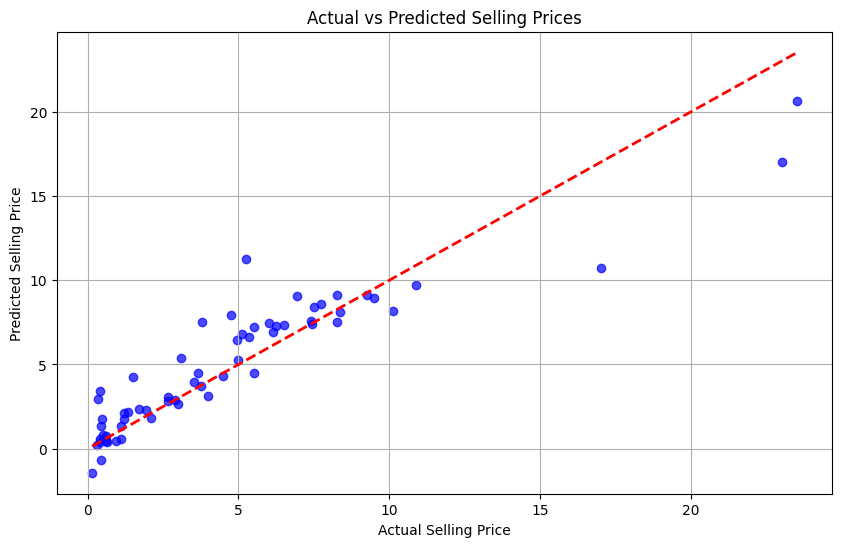

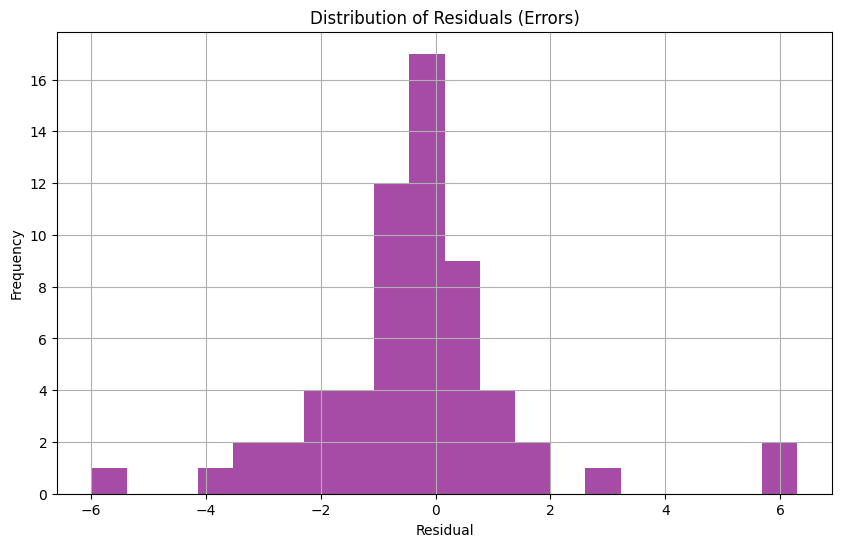

In [5]:
import matplotlib.pyplot as plt

# Visualizing actual vs predicted selling prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid()
plt.show()

# Visualizing residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid()
plt.show()
